<a href="https://colab.research.google.com/github/smartinternz02/SBSPS-Challenge-9552-Real-Time-Air-Quality-Monitoring-Weather-Forecasting-System/blob/main/RealTimeAirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uploading dataset

from google.colab import files
dataset1 = files.upload()

Saving Air_Quality.csv to Air_Quality.csv


In [ ]:
# Reading dataset

import pandas as pd
data = pd.read_csv('Air_Quality.csv')
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
# Conversion of argument to datetime

data['Date'] = pd.to_datetime(data['Date'])

# Renaming of coulmn 

data.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  object        
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        24933 non-null  float64       
 3   PM10         18391 non-null  float64       
 4   NO           25949 non-null  float64       
 5   NO2          25946 non-null  float64       
 6   NOx          25346 non-null  float64       
 7   NH3          19203 non-null  float64       
 8   CO           27472 non-null  float64       
 9   SO2          25677 non-null  float64       
 10  O3           25509 non-null  float64       
 11  Benzene      23908 non-null  float64       
 12  Toluene      21490 non-null  float64       
 13  Xylene       11422 non-null  float64       
 14  AQI          24850 non-null  float64       
 15  Air_quality  24850 non-null  object        
dtypes: d

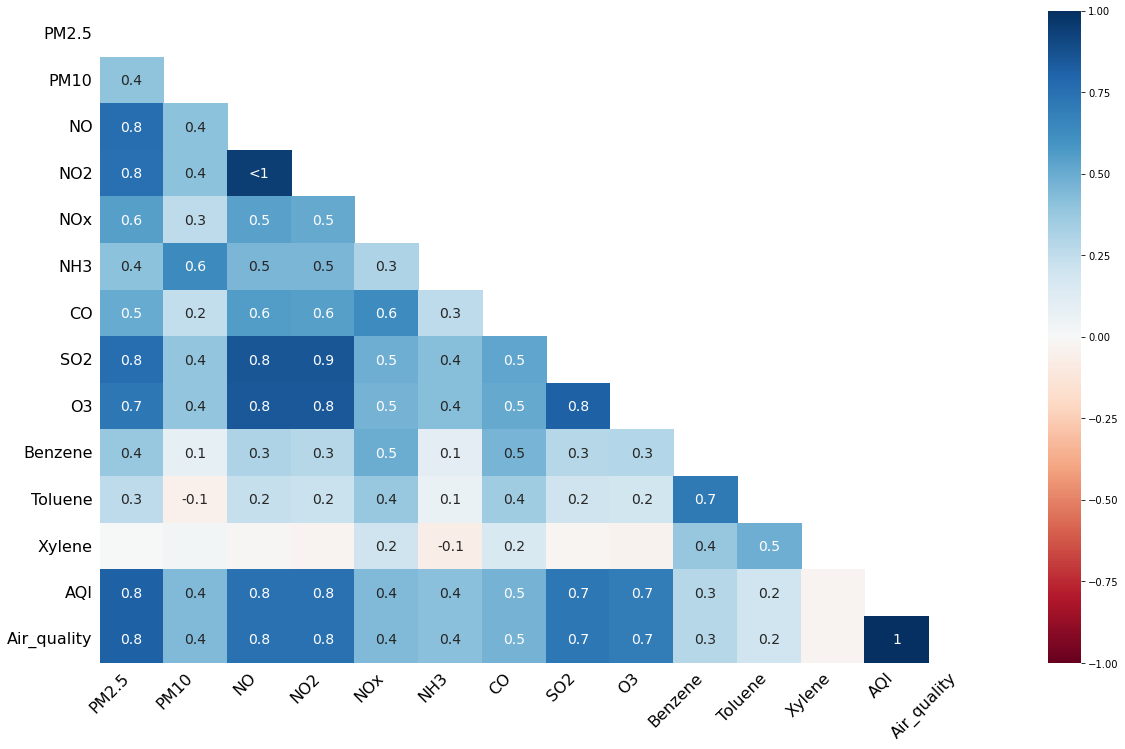

In [ ]:
# Missing value analysis and Treatment

import missingno as msno
msno.heatmap(data)

In [ ]:
# Handling missing values

data_new = data.copy()
data_new['PM2.5']=data_new['PM2.5'].fillna((data_new['PM2.5'].median()))
data_new['PM10']=data_new['PM10'].fillna((data_new['PM10'].median()))
data_new['NO']=data_new['NO'].fillna((data_new['NO'].median()))
data_new['NO2']=data_new['NO2'].fillna((data_new['NO2'].median()))
data_new['NOx']=data_new['NOx'].fillna((data_new['NOx'].median()))
data_new['NH3']=data_new['NH3'].fillna((data_new['NH3'].median()))
data_new['CO']=data_new['CO'].fillna((data_new['CO'].median()))
data_new['SO2']=data_new['SO2'].fillna((data_new['SO2'].median()))
data_new['O3']=data_new['O3'].fillna((data_new['O3'].median()))
data_new['Benzene']=data_new['Benzene'].fillna((data_new['Benzene'].median()))
data_new['Toluene']=data_new['Toluene'].fillna((data_new['Toluene'].median()))
data_new['Xylene']=data_new['Xylene'].fillna((data_new['Xylene'].median()))
data_new['AQI']=data_new['AQI'].fillna((data_new['AQI'].median()))
data_new['Air_quality']=data_new['Air_quality'].fillna('Moderate')

In [ ]:
# Knowing categprical variables

from sklearn.preprocessing import  LabelEncoder
categorical_attributes = list(data_new.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)

categorical_attributes ['City', 'Air_quality']


In [ ]:
# Preprocessing (Conversion of categorical variables to numerical values) and Spliting of data

from sklearn.model_selection import train_test_split
le=LabelEncoder()
data_new['Air_quality']=le.fit_transform(data_new['Air_quality'].astype(str))
y = data_new["Air_quality"]
x = data_new[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
X_train['City']=le.fit_transform(X_train['City'])
X_test['City'] =le.fit_transform(X_test['City'])
X_test

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
10960,10,191.50,402.31,103.24,66.19,55.29,55.92,1.31,25.13,50.03,8.39,19.94,0.98,332.0
29410,25,65.64,151.40,2.64,51.57,28.80,18.98,1.15,6.01,13.71,5.57,16.02,3.19,127.0
7401,6,66.04,186.21,9.16,16.90,18.96,78.53,0.05,3.50,28.73,0.79,2.97,0.98,118.0
1190,0,104.23,95.68,40.30,69.08,63.98,15.85,40.30,19.21,42.57,15.30,42.19,8.47,740.0
6919,6,73.58,92.89,17.25,27.27,27.01,18.64,0.48,12.36,7.85,0.41,2.97,0.98,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26750,23,82.46,266.72,10.86,33.73,43.42,15.85,2.67,21.72,5.02,0.00,2.97,0.98,241.0
3943,3,24.46,48.21,16.32,10.40,25.54,11.47,0.29,8.03,19.29,3.32,1.11,6.40,52.0
12256,11,36.94,65.81,81.30,21.69,64.43,54.52,1.15,3.53,30.84,0.81,1.33,0.05,86.0
28176,25,48.57,95.68,9.89,21.69,23.52,15.85,0.89,9.16,30.84,1.07,2.97,0.98,118.0


In [ ]:
# Coorelation matrix

coorelation_matrix = data_new.corr()
coorelation_matrix.style.background_gradient(cmap='coolwarm')

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
PM2.5,1.000000,0.520767,0.435245,0.358287,0.375938,0.164615,0.093695,0.120451,0.166064,0.030539,0.132609,0.087813,0.633654,0.408614
PM10,0.520767,1.000000,0.433864,0.352396,0.416523,0.200548,0.023932,0.165468,0.208398,0.027522,0.126400,0.030257,0.447686,0.208080
NO,0.435245,0.433864,1.000000,0.465848,0.747409,0.155804,0.221445,0.174881,0.020788,0.045202,0.151930,0.084393,0.438039,0.259407
NO2,0.358287,0.352396,0.465848,1.000000,0.581938,0.151731,0.361750,0.388413,0.289435,0.042179,0.297913,0.188965,0.531952,0.259199
NOx,0.375938,0.416523,0.747409,0.581938,1.000000,0.129433,0.231878,0.205912,0.089095,0.049004,0.184764,0.085447,0.436282,0.212592
NH3,0.164615,0.200548,0.155804,0.151731,0.129433,1.000000,-0.014252,-0.048679,0.076295,0.004093,0.020040,-0.030328,0.097916,0.077250
CO,0.093695,0.023932,0.221445,0.361750,0.231878,-0.014252,1.000000,0.476784,0.043311,0.066022,0.285559,0.181215,0.650475,0.215848
SO2,0.120451,0.165468,0.174881,0.388413,0.205912,-0.048679,0.476784,1.000000,0.160489,0.038955,0.273314,0.249808,0.454182,0.170843
O3,0.166064,0.208398,0.020788,0.289435,0.089095,0.076295,0.043311,0.160489,1.000000,0.023982,0.135498,0.084323,0.199100,0.030637
Benzene,0.030539,0.027522,0.045202,0.042179,0.049004,0.004093,0.066022,0.038955,0.023982,1.000000,0.693310,0.094190,0.052027,0.037358


In [ ]:
from collections import Counter
print('Classes and number of values in trainset',Counter(y_train))

# Target variable is not splitted equally

Classes and number of values in trainset Counter({1: 9393, 3: 5799, 2: 1940, 5: 1634, 4: 957, 0: 948})


In [ ]:
#Solving data imbalance problem

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({1: 9393, 5: 9393, 3: 9393, 0: 9393, 2: 9393, 4: 9393})


In [ ]:
# Classification using Support vector machine

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cls=SVC()
cls.fit(X_train,y_train)
svmpred=cls.predict(X_test)
svmpred
cm=confusion_matrix(y_test,svmpred)
print("confussion matrix")
print(cm)
print("\n")
accuracy=accuracy_score(y_test,svmpred)
print("accuracy",accuracy*100)

confussion matrix
[[ 393    0    0    0    0    0]
 [   0 3945   78   94    0    0]
 [   0    0  819    0    0   22]
 [ 123    2    0 2300    0    0]
 [   0    0    0    0  381    0]
 [   0    0    1    0   14  688]]


accuracy 96.23024830699775


In [ ]:
# Classification using Random forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, random_state=23)
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)
rf_predict1=rf.predict(X_train)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("accuracy",rf_acc_score*100)

confussion matrix
[[ 393    0    0    0    0    0]
 [   0 4116    1    0    0    0]
 [   0    1  840    0    0    0]
 [   0    2    0 2423    0    0]
 [   0    0    0    0  381    0]
 [   0    0    0    0    0  703]]


accuracy 99.9548532731377


In [ ]:
# Classification using XGB(Extra Gradient Boost classifier)

from xgboost import XGBClassifier
gbc=XGBClassifier(learning_rate =0.01,n_estimators=100,max_depth=1,
                  min_child_weight=6,subsample=0.8,seed=13)
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)*100
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("accuracy",accuracy)

confussion matrix
[[ 393    0    0    0    0    0]
 [   0 4117    0    0    0    0]
 [   0    0  841    0    0    0]
 [   0    0    0 2425    0    0]
 [   0    0    0    0  381    0]
 [   0    0    0    0    0  703]]


accuracy 100.0


In [ ]:
# Making data ready for real time prediction

data_final=data_new.drop(['NO','NOx','Benzene','Toluene','Xylene'],axis=1)
data_final.head()

,City,Date,PM2.5,PM10,NO2,NH3,CO,SO2,O3,AQI,Air_quality
0,Ahmedabad,2015-01-01,48.57,95.68,18.22,15.85,0.92,27.64,133.36,118.0,1
1,Ahmedabad,2015-01-02,48.57,95.68,15.69,15.85,0.97,24.55,34.06,118.0,1
2,Ahmedabad,2015-01-03,48.57,95.68,19.30,15.85,17.40,29.07,30.70,118.0,1
3,Ahmedabad,2015-01-04,48.57,95.68,18.48,15.85,1.70,18.59,36.08,118.0,1
4,Ahmedabad,2015-01-05,48.57,95.68,21.42,15.85,22.10,39.33,39.31,118.0,1


In [ ]:
# Preprocessing  and spliting of new data

le=LabelEncoder()
data_final['Air_quality']=le.fit_transform(data_final['Air_quality'].astype(str))
y = data_final["Air_quality"]
x = data_final[['City', 'PM2.5', 'PM10', 'NO2',  'NH3', 'CO', 'SO2',
       'O3', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
X_train['City']=le.fit_transform(X_train['City'])
X_test['City'] =le.fit_transform(X_test['City'])
X_test

In [ ]:
# Classification using XGB(Extra Gradient Boost classifier)

gbc=XGBClassifier(learning_rate =0.01,n_estimators=100,max_depth=1,
                  min_child_weight=6,subsample=0.8,seed=13)
gbc.fit(X_train,y_train)


XGBClassifier(learning_rate=0.01, max_depth=1, min_child_weight=6,
              objective='multi:softprob', seed=13, subsample=0.8)

In [ ]:
# Uploading real time data set

from google.colab import files
dataset1 = files.upload()

Saving Air_Quality (3).xlsx to Air_Quality (3) (5).xlsx


In [ ]:
# Reading real time data

real_data = pd.read_excel('Air_Quality (3) (4).xlsx')
real_data.head()

,City,PM2.5,PM10,NO2,NH3,CO,SO2,OZONE,AQI
0,Visakhapatnam,91,109,88,10,104,34,64,63
1,Thiruvananthapuram,59,48,28,2,24,5,26,48
2,Talcher,246,141,45,87,113,93,82,99
3,Shillong,41,39,20,1,32,13,3,23
4,Patna,64,65,16,7,64,7,14,56


In [ ]:
# preprocessing(Conversion of categorical variables to numerical variables) and renaming

real_data['City']=le.fit_transform(real_data['City'])
real_data.rename(columns = {'OZONE':'O3'}, inplace = True)
real_data

,City,PM2.5,PM10,NO2,NH3,CO,SO2,O3,AQI
0,25,91,109,88,10,104,34,64,63
1,24,59,48,28,2,24,5,26,48
2,23,246,141,45,87,113,93,82,99
3,22,41,39,20,1,32,13,3,23
4,21,64,65,16,7,64,7,14,56
5,20,81,173,102,30,121,38,11,114
6,19,35,51,11,1,23,24,29,40
7,18,32,37,28,9,19,17,48,33
8,17,301,159,9,22,20,1,2,85
9,16,87,351,38,8,102,32,17,99


In [ ]:
# Prediction

pred_new = gbc.predict(real_data)
pred_new

array([3, 0, 3, 0, 3, 1, 0, 0, 3, 3, 3, 1, 0, 3, 3, 1, 0, 1, 3, 0, 3, 3,
       3, 0, 0, 3])

In [ ]:
# Conversion of numerical variables to categorical variables

real_data['City']=le.inverse_transform(real_data['City'])

In [ ]:
# Final dataframe

final_data_frame = pd.DataFrame(real_data['City'], columns = ['City'])
final_data_frame["airquality"]=pred_new
final_data_frame.head()

,City,airquality
0,Visakhapatnam,3
1,Thiruvananthapuram,0
2,Talcher,3
3,Shillong,0
4,Patna,3
